In [1]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import re
df = pd.read_csv('NYC_Restaurants.csv', dtype=unicode)

Q1

In [2]:
#print df
df['restaurants'] = df['DBA']+' '+df['BUILDING']+' '+df['STREET']+' '+df['ZIPCODE']
print df['restaurants'][0:10]

0                    WENDY'S 469 FLATBUSH AVENUE 11225
1                    WENDY'S 469 FLATBUSH AVENUE 11225
2                    WENDY'S 469 FLATBUSH AVENUE 11225
3                    WENDY'S 469 FLATBUSH AVENUE 11225
4                    WENDY'S 469 FLATBUSH AVENUE 11225
5               TOV KOSHER KITCHEN 97-22 63 ROAD 11374
6               TOV KOSHER KITCHEN 97-22 63 ROAD 11374
7               TOV KOSHER KITCHEN 97-22 63 ROAD 11374
8               TOV KOSHER KITCHEN 97-22 63 ROAD 11374
9    BRUNOS ON THE BOULEVARD 8825 ASTORIA BOULEVARD...
Name: restaurants, dtype: object


Q2

In [4]:
#Removes the duplicates in th newly created dataset with drop_duplicates
Uniq = df.drop_duplicates(subset = 'restaurants')
Uniq_len=len(Uniq)
print 'There are ',Uniq_len, 'Unique Resturants'

There are  10114 Unique Resturants


Q3

In [5]:
#Using a mask create a new data frame of only chains
Chainlist = Uniq['DBA'].value_counts() 
Chainmask = Chainlist > 1
Chains = Chainlist[Chainmask]
Chains_len = len(Chains)
print 'There are', Chains_len, 'different resturant chains in NYC.'

There are 368 different resturant chains in NYC.


Q4

In [6]:
top20 = Chains[0:20]
top20.plot(kind='bar')

Q5

In [7]:
Chain_frac = int(sum(Chains.values)/float(len(Uniq))*1000)/float(10)
print "Of the resturants in NYC", str(Chain_frac), '% are chains.'

Of the resturants in NYC 16.4 % are chains.


C:\ProgramData\Anaconda2\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


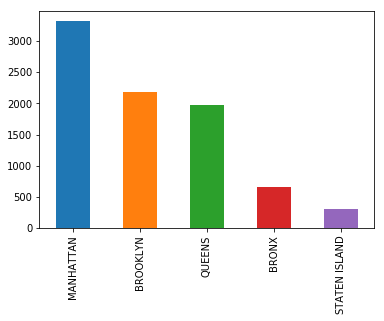

In [9]:
def boro_finder(s):
    """If there is a non-chain in the list of Boros return true"""
    return (s in Non_Chains.index)

#Using a mask create a new data frame of only non-chains
Non_Chainlist = Uniq['DBA'].value_counts() 
Non_Chainmask = Non_Chainlist < 2
Non_Chains = Non_Chainlist[Non_Chainmask]
#Remove the missing BORO Data
noboro = (Uniq['BORO']=='Missing')
Uniq.loc[noboro,'BORO'] = np.nan
#Apply the map function, finding how many chains are in each BORO
No_ChainMask = Uniq['DBA'].map(boro_finder)
No_ChainBoro = Uniq[No_ChainMask]
No_ChainBoro_vc = No_ChainBoro["BORO"].value_counts()
No_ChainBoro_vc.plot(kind='bar')
#I can't figure out what the error that prints out for this is saying.

Q7

No, Brooklyn has the highest ratio of, while Manhattan has the most non-chain returants.


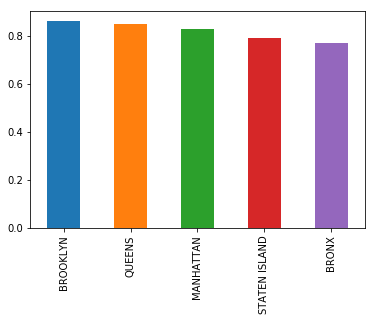

In [10]:
#Get the total of unique resturants in each BORO and then calculate the fraction
TotalBoro_vc = Uniq['BORO'].value_counts()
Boro_frac = (No_ChainBoro_vc/TotalBoro_vc)
Boro_frac = Boro_frac.sort_values(ascending = False)
Boro_frac.plot(kind='bar')
print "No, Brooklyn has the highest ratio of, while Manhattan has the most non-chain returants."

Q8

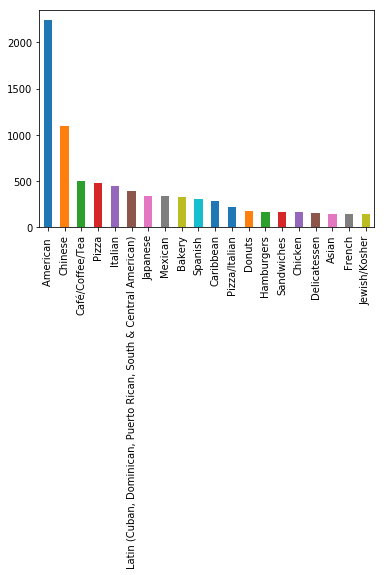

In [14]:
Cuisines_vc = Uniq["CUISINE DESCRIPTION"].value_counts()
Cuisines_vc[:20].plot(kind='bar')

Q9

Of all the unique resturants in NYC only 241 haven't been cited for a violation.


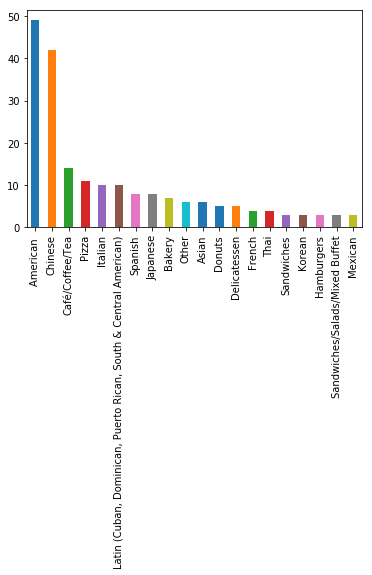

In [15]:
def clean_finder(s):
    """This will find resturants that haven't been cited for a violation"""
    return(s not in CuisinesDirty_vc)

#Find the values for "VIOLATION CODE" that arent null within Uniq
CuisinesDirty = df[df["VIOLATION CODE"].notnull()]
CuisinesDirty_vc = CuisinesDirty["restaurants"].value_counts()
#Apply the map function and plot
CuisinesClean = df.copy()
CuisinesClean_mask = CuisinesClean["restaurants"].map(clean_finder)
CuisinesClean = CuisinesClean[CuisinesClean_mask]
CuisinesClean = CuisinesClean.drop_duplicates(subset='restaurants')
CuisinesClean_vc = CuisinesClean['CUISINE DESCRIPTION'].value_counts()
CuisinesClean_vc[:20].plot(kind='bar')
print "Of all the unique resturants in NYC only",str(len(CuisinesClean)),"haven't been cited for a violation."



Q10

In [16]:
def popular_finder(s):
    """This will find resturants who serve popular cuisines"""
    return(s in CuisinesPopular)
#Create a copy of the data frame and find the popular resturants
Cuisines = Uniq.copy()
CuisinesClean2 = CuisinesClean.copy()
Cuisines_vc = Cuisines["CUISINE DESCRIPTION"].value_counts()
CuisinesPopular_mask = Cuisines_vc > 19
CuisinesPopular = Cuisines_vc[CuisinesPopular_mask]
#Ratio for Q8
Q8_mask = Cuisines["CUISINE DESCRIPTION"].map(popular_finder)
Cuisines = Cuisines[Q8_mask]
#Ratio for Q9
Q9_mask = CuisinesClean2["CUISINE DESCRIPTION"].map(popular_finder)
CuisinesClean2 = CuisinesClean2[Q9_mask]
#Creating the counts and calculating the ratios
TotalCount = Cuisines["CUISINE DESCRIPTION"].value_counts()
TotalClean = CuisinesClean2["CUISINE DESCRIPTION"].value_counts()
PopularRatio = (TotalClean*1.0)/(TotalCount*1.0)
pop_mask = PopularRatio.notnull()
PopularRatio = PopularRatio[pop_mask]
PopularRatio = PopularRatio.sort_values(ascending = False)
print "The top 10 cuisines with the highest 'cleanliness' ratios are\n", PopularRatio[:10]


The top 10 cuisines with the highest 'cleanliness' ratios are
Soul Food                        0.090909
Vietnamese/Cambodian/Malaysia    0.062500
Other                            0.058252
Soups & Sandwiches               0.047619
Continental                      0.047619
Barbecue                         0.047619
Asian                            0.041096
Chinese                          0.038251
Greek                            0.036364
Peruvian                         0.035714
Name: CUISINE DESCRIPTION, dtype: float64


Q11

In [17]:
BoroViolations = pd.crosstab(df["BORO"], df["VIOLATION DESCRIPTION"])
print "The most common violations is each borough are...\n", BoroViolations.T.idxmax()

The most common violations is each borough are...
BORO
BRONX            Non-food contact surface improperly constructe...
BROOKLYN         Non-food contact surface improperly constructe...
MANHATTAN        Non-food contact surface improperly constructe...
Missing          Non-food contact surface improperly constructe...
QUEENS           Non-food contact surface improperly constructe...
STATEN ISLAND    Non-food contact surface improperly constructe...
dtype: object


Q12

In [18]:
Violations_vc = df["VIOLATION DESCRIPTION"].value_counts()
Violations_freq = (BoroViolations * 1.0)/(Violations_vc * 1.0)
print "The most common violations after normalization are...\n", Violations_freq.T.idxmax()

The most common violations after normalization are...
BORO
BRONX                                  Unprotected food re-served.
BROOKLYN         Precooked potentially hazardous food from comm...
MANHATTAN        Out-of package sale of tobacco products observed.
Missing          ''''Wash hands sign not posted at hand wash f...
QUEENS           Caloric content range (minimum to maximum) not...
STATEN ISLAND    Eggs found dirty/cracked; liquid, frozen or po...
dtype: object


Q13

In [19]:
def Code_finder(s):
    """Finds the area code for a resturants phone number"""
    return s[0:3]
#Apply te map and group in new coloumn
df["AREA CODE"] = df["PHONE"].map(Code_finder)
df["AREA AND ZIP"] = df["AREA CODE"].map(str) + ' ' + df["ZIPCODE"]
AreaZip = df.drop_duplicates(subset='AREA AND ZIP')
AreaZip_vc = AreaZip["AREA CODE"].value_counts()
zip_mask = AreaZip_vc <2
AreaZip_count = len(AreaZip_vc[zip_mask])
print "There are",str(AreaZip_count), "phone area codes that correspond to a single zip code."


There are 34 phone area codes that correspond to a single zip code.


Q14

In [20]:
def last_word(s):
    """Finds the last word of the phrase"""
    list = re.findall("\w+",s)
    list = list[-1:]
    return "".join(list)
def everything_else(s):
    """Returns all of the phrase besides the last word"""
    list = re.findall("\w+",s)
    list = list[:-1]
    return " ".join(list)

#Creating a table from the adresses of the resturants
df["STREET_TYPE"] = df["STREET"].map(last_word)
df["STREET_BASE"] = df["STREET"].map(everything_else)
df["STREET_BASE&ZIP"] = df["STREET_NAME"].map(str) + " " +df["ZIPCODE"]
Streets = df[["STREET_BASE", "STREET_TYPE", "STREET_BASE&ZIP"]].drop_duplicates()
#print Streets #Checking for input errors
Streets_mask = Streets["STREET_BASE"] != ''
Streets = Streets[Streets_mask]

#Merging into the table into the table in the column "STREET_NAME_ZIP"
Streets_merge = Streets.merge(Streets, left_on = 'STREET_BASE&ZIP', right_on = 'STREET_BASE&ZIP')
#print Streets_merge

#Creating another table with all instances of differing names and zip codes
#It took me so long to realise the 'x' & 'y' from the table were lower case...
Streets_difmask = Streets_merge["STREET_TYPE_x"] != Streets_merge["STREET_TYPE_y"]
Streets_dif =Streets_merge[Streets_difmask]
#Run crosstab on the table of differing names
Streets_tab = pd.crosstab(Streets_dif.STREET_TYPE_x,Streets_dif.STREET_TYPE_y)

#Find the most common streets of each street type
AVE,ST,RD,PL = Streets_tabmax["AVE"],Streets_tabmax["ST"],Streets_tabmax["RD"],Streets_tabmax["PL"]
BOULEARD,BULEVARD = Streets_tabmax["BOULEARD"],Streets_tabmax["BULEVARD"]
print "For 'AVE' the most common street type is ",AVE
print "For 'ST' the most common street type is ",ST
print "For 'RD' the most common street type is ",RD
print "For 'PL' the most common street type is ",PL
print "For 'BOULEARD' the most common street type is ",BOULEARD
print "For 'BULEVARD' the most common street type is ",BULEVARD


KeyError: 'STREET_NAME'